# Trabajo Final Visualización Avanzada

#### Por Manuel Sánchez Mc Sweeney

- Este trabajo esta realizado por un dataset editado por mismo, pero obtenido de la página de Kaggle. El dataset muestra varios datasets, separados por año, resultado de cada calificación por circuito y el resultado de cada carrera por circuito. Al ser más de 200 datasets entre calificaciones y resultados de las carreras, he tomado los datasets de los resultados del 2019 al 2022 y los he colocado en un mismo dataset llamado "Tabla_TareaFinal_nuevo.csv".

- Ádemas, en la carpeta ZIP hay un documento PDF con screenshots de los graficos y una pequeña descripción de cada gráfico realizado.

Los datasets fueron obtenidos del enlace:

                https://www.kaggle.com/datasets/rprkh15/f1-race-and-qualifying-data

In [240]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

In [242]:
df = pd.read_csv('Tabla_TareaFinal_nuevo.csv')

In [244]:
df.shape

(2620, 10)

In [246]:
df.describe(include = 'all')

,Year,Grand Prix,Position,Driver Number,Driver,Driver Abbreviation,Car,Laps,Finished/Not Finished,Points
count,2620.000000,2620,2620,2620.000000,2620,2620,2620,2620.000000,2618,2620.000000
unique,NaN,33,24,NaN,42,41,25,NaN,4,NaN
top,NaN,Spain,Crashed/Failed,NaN,Max Verstappen,VER,Ferrari,NaN,Finished,NaN
freq,NaN,142,408,NaN,129,129,258,NaN,2157,NaN
mean,2018.732824,NaN,NaN,27.361450,NaN,NaN,NaN,53.537405,NaN,4.976718
std,1.945514,NaN,NaN,24.826536,NaN,NaN,NaN,18.386202,NaN,7.169618
min,2016.000000,NaN,NaN,1.000000,NaN,NaN,NaN,0.000000,NaN,0.000000
25%,2017.000000,NaN,NaN,9.000000,NaN,NaN,NaN,51.000000,NaN,0.000000
50%,2019.000000,NaN,NaN,20.000000,NaN,NaN,NaN,56.000000,NaN,0.000000
75%,2021.000000,NaN,NaN,33.000000,NaN,NaN,NaN,66.000000,NaN,8.000000


In [248]:
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2620 entries, 0 to 2619
Data columns (total 10 columns):
 #   Column                 Non-Null Count  Dtype 
---  ------                 --------------  ----- 
 0   Year                   2620 non-null   int64 
 1   Grand Prix             2620 non-null   object
 2   Position               2620 non-null   object
 3   Driver Number          2620 non-null   int64 
 4   Driver                 2620 non-null   object
 5   Driver Abbreviation    2620 non-null   object
 6   Car                    2620 non-null   object
 7   Laps                   2620 non-null   int64 
 8   Finished/Not Finished  2618 non-null   object
 9   Points                 2620 non-null   int64 
dtypes: int64(4), object(6)
memory usage: 204.8+ KB
None


### 1. Posiciones de los pilotos a lo largo de los años

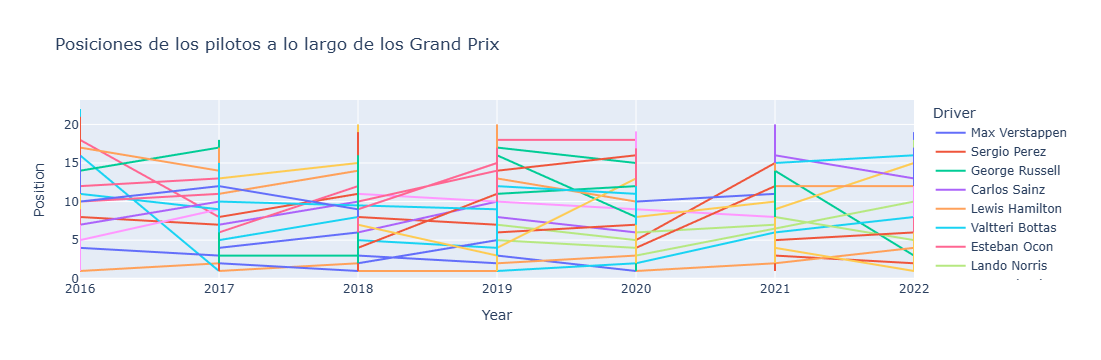

In [353]:
posiciones = px.line(
    df, x='Year',
    y='Position',
    color='Driver',
    title='Posiciones de los pilotos a lo largo de los Grand Prix'
)
posiciones.show()

### 2. Puntos totales conseguidos por piloto del 2016 al 2022

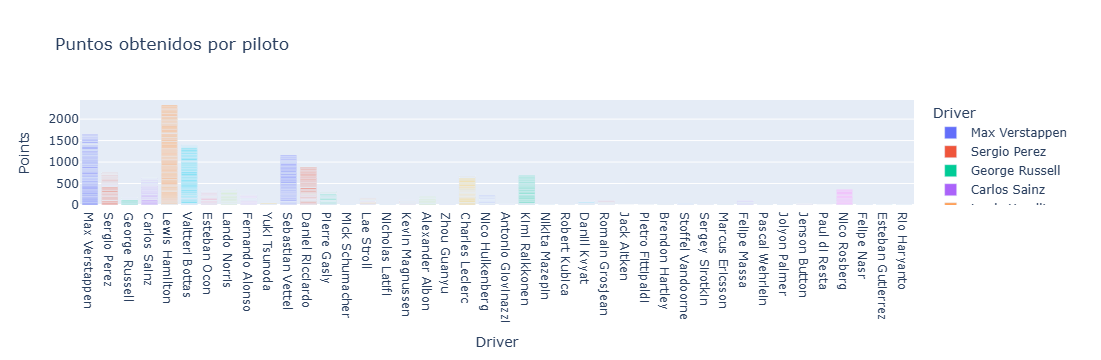

In [356]:
puntos_piloto = px.bar(
    df,
    x='Driver',
    y='Points',
    color='Driver',
    title='Puntos obtenidos por piloto'
)
puntos_piloto.show()

### 3. Treemap resultado por año en cada Grand Prix por Piloto

In [255]:
grouped_dataa = df.groupby(['Year', 'Grand Prix', 'Driver'], as_index=False)['Points'].sum()

In [256]:
grouped_dataa = grouped_dataa[grouped_dataa['Points'] > 0]

In [257]:
figa = px.treemap(grouped_dataa, 
                 path=['Year', 'Grand Prix', 'Driver'],
                 values='Points',
                 title='Resultados por año, Grand Prix de cada piloto F1 ',
                 color='Points',
                 color_continuous_scale='RdBu'
                )


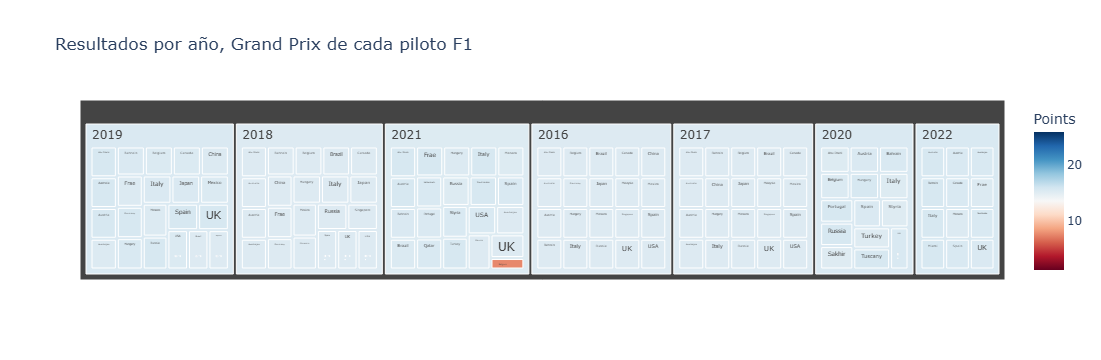

In [258]:
figa.show()

### 4. Treemap resultado por año y Grand Prix por Constructor (Marca)

In [260]:
grouped_datab = df.groupby(['Year', 'Grand Prix', 'Car'], as_index=False)['Points'].sum()

In [266]:
grouped_datab = grouped_datab[grouped_datab['Points'] > 0]

In [270]:
figb = px.treemap(grouped_datab, 
                 path=['Year', 'Grand Prix', 'Car'],
                 values='Points',
                 title='Resultados por año, Grand Prix de cada contructor F1 ',
                 color='Points',
                 color_continuous_scale='RdBu'
                )

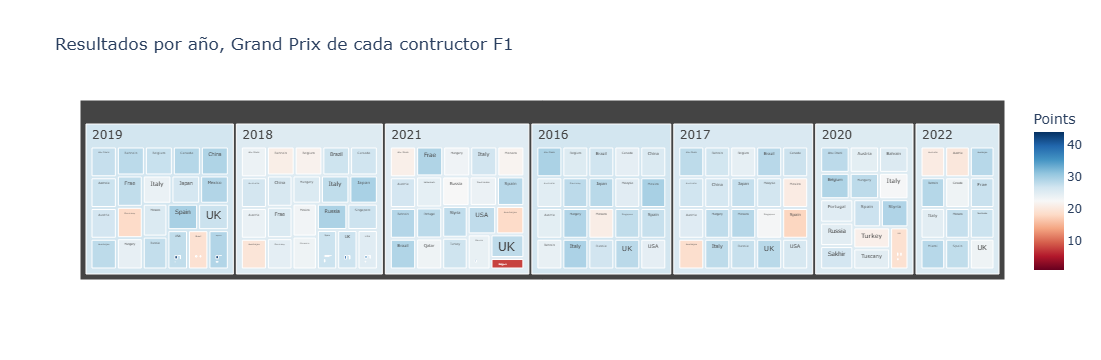

In [272]:
figb.show()

### 5. Primera lugar por piloto

In [275]:
print(primer_lugar.head())

      Year Grand Prix  Position  Driver Number            Driver  \
940   2019        USA       1.0             77   Valtteri Bottas   
960   2019      Spain       1.0             44    Lewis Hamilton   
980   2019  Singapure       1.0              5  Sebastian Vettel   
1000  2019     Russia       1.0             44    Lewis Hamilton   
1020  2019     Monaco       1.0             44    Lewis Hamilton   

     Driver Abbreviation       Car  Laps Finished/Not Finished  Points  
940                  BOT  Mercedes    56              Finished      25  
960                  HAM  Mercedes    66              Finished      26  
980                  VET   Ferrari    61              Finished      25  
1000                 HAM  Mercedes    53              Finished      26  
1020                 HAM  Mercedes    78              Finished      25  


In [277]:
print(primer_lugar.shape)

(21, 10)


In [279]:
print(df['Position'].dtype)

object


In [281]:
print(df['Position'].unique())

['1' '2' '3' '4' '5' '6' '7' '8' '9' '10' '11' '12' '13' '14' '15' '16'
 '17' '18' 'Crashed/Failed' '19' '20' 'Disqualified' '21' '22']


In [283]:
df['Position'] = pd.to_numeric(df['Position'], errors='coerce')
primer_lugar = df[df['Position'] == 1]

In [285]:
primer_lugar_counts = primer_lugar['Driver'].value_counts().reset_index()
primer_lugar_counts.columns = ['Driver', 'First Place Count']

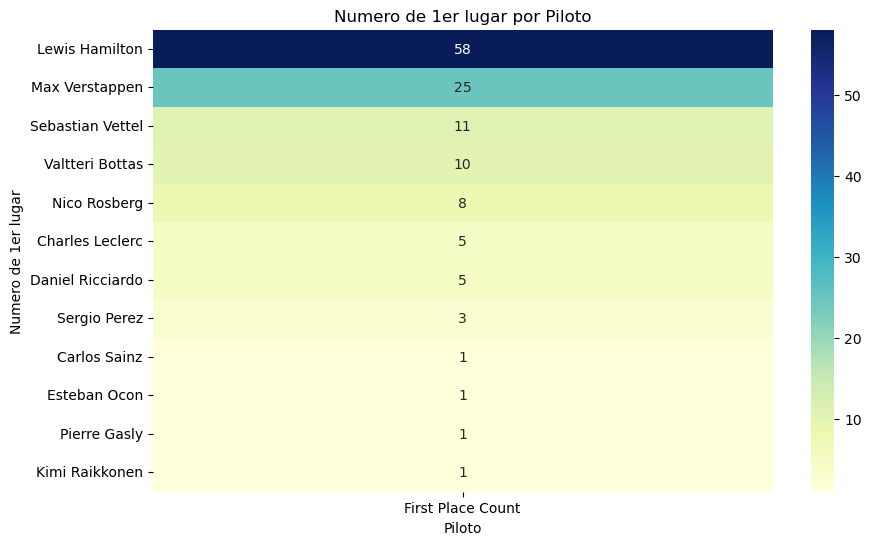

In [287]:
plt.figure(figsize=(10,6))
sns.heatmap(primer_lugar_counts.set_index('Driver'), cmap='YlGnBu', annot=True, fmt='d')
plt.title('Numero de 1er lugar por Piloto')
plt.xlabel('Piloto')
plt.ylabel('Numero de 1er lugar')
plt.xticks(rotation=0)
plt.show()

### 6. Primer lugar por Constructor en el año 2019


In [359]:
df_2019 = df[df['Year'] == 2019].copy()

In [368]:
df_2019['Position'] = pd.to_numeric(df_2019['Position'], errors='coerce')

In [370]:
primer_lugar = df_2019[df_2019['Position'] == 1]

In [372]:
if primer_lugar.empty:
    print('No hay constructor que haya terminado en primer lugar en el 2019')
else:
    primer_lugar_counts = primer_lugar['Car'].value_counts().reset_index()

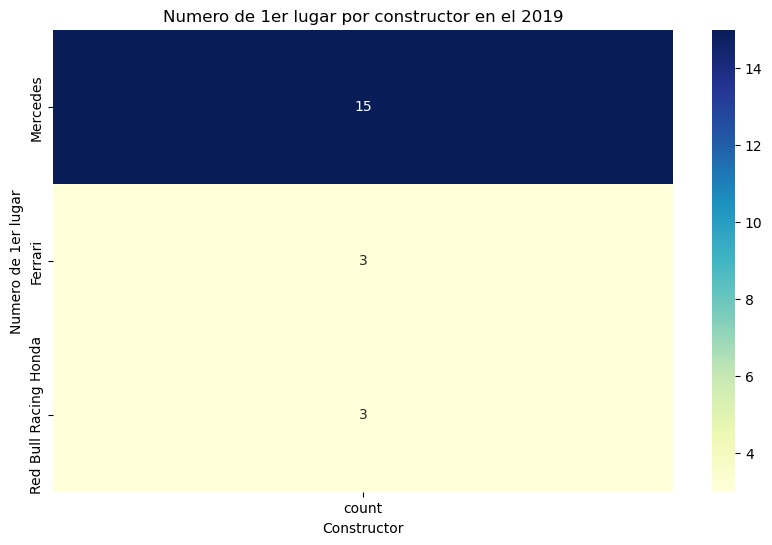

In [374]:
plt.figure(figsize=(10,6))
sns.heatmap(primer_lugar_counts.set_index('Car'), cmap='YlGnBu', annot=True, fmt='d')
plt.title('Numero de 1er lugar por constructor en el 2019')
plt.xlabel('Constructor')
plt.ylabel('Numero de 1er lugar')
plt.xticks(rotation=0)
plt.show()

### 7. Evolucion de puntos por piloto

In [331]:
pilotos = ['Max Verstappen', 'Lewis Hamilton', 'Sebastian Vettel', 'Valtteri Bottas', 'Nico Rosberg', 'Esteban Ocon', 'Pierre Gasly', 'George Russell']
df_pilotos = df[df['Driver'].isin(pilotos)]

In [333]:
puntosabc = df_pilotos.groupby(['Year','Driver'])['Points'].sum().unstack(fill_value=0)

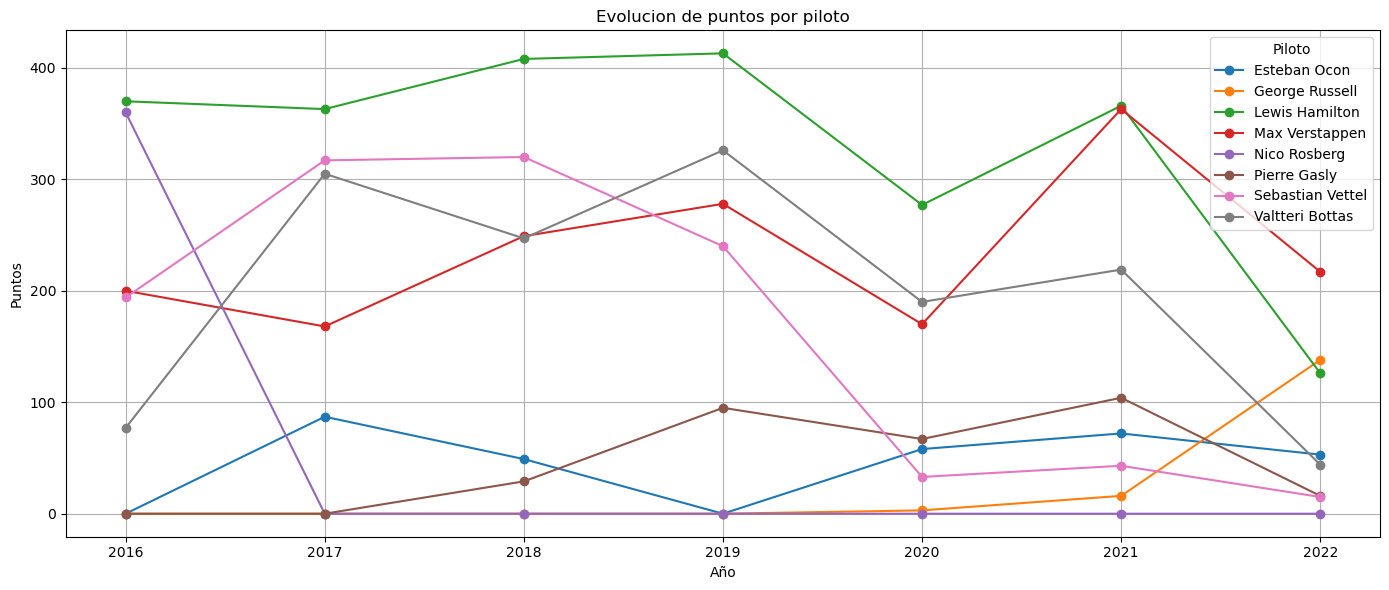

In [347]:
plt.figure(figsize = (14,6))
for piloto in puntosabc.columns:
    plt.plot(puntosabc.index, puntosabc[piloto], marker='o', label=piloto)

plt.title('Evolucion de puntos por piloto')
plt.xlabel('Año')
plt.ylabel('Puntos')
plt.xticks(puntosabc.index)
plt.legend(title='Piloto')
plt.grid()
plt.tight_layout()
plt.show()